In [3]:
#Import all necessary Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder

filepath=r"C:\Users\Owner\Downloads\archive\Housing.csv" #FILE LOACTION ON MY COMPUTER

In [4]:
#Perform Exploratory data Analysis 
data = pd.read_csv(filepath)
print(data.head())
print(data.info())
print(data.describe())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

In [5]:
#checking the number of uniques classes our categorical feayures have 
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for column in categorical_columns:
    print(f"{column}: {data[column].nunique()} unique classes")

mainroad: 2 unique classes
guestroom: 2 unique classes
basement: 2 unique classes
hotwaterheating: 2 unique classes
airconditioning: 2 unique classes
prefarea: 2 unique classes
furnishingstatus: 3 unique classes


In [6]:
unique_classes = data["furnishingstatus"].unique()
print(unique_classes)
print(data['furnishingstatus'].value_counts()) 


['furnished' 'semi-furnished' 'unfurnished']
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


In [7]:
print(data['furnishingstatus'].dtype)

object


In [8]:
print(data.isnull().sum()) #check for missing value 

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


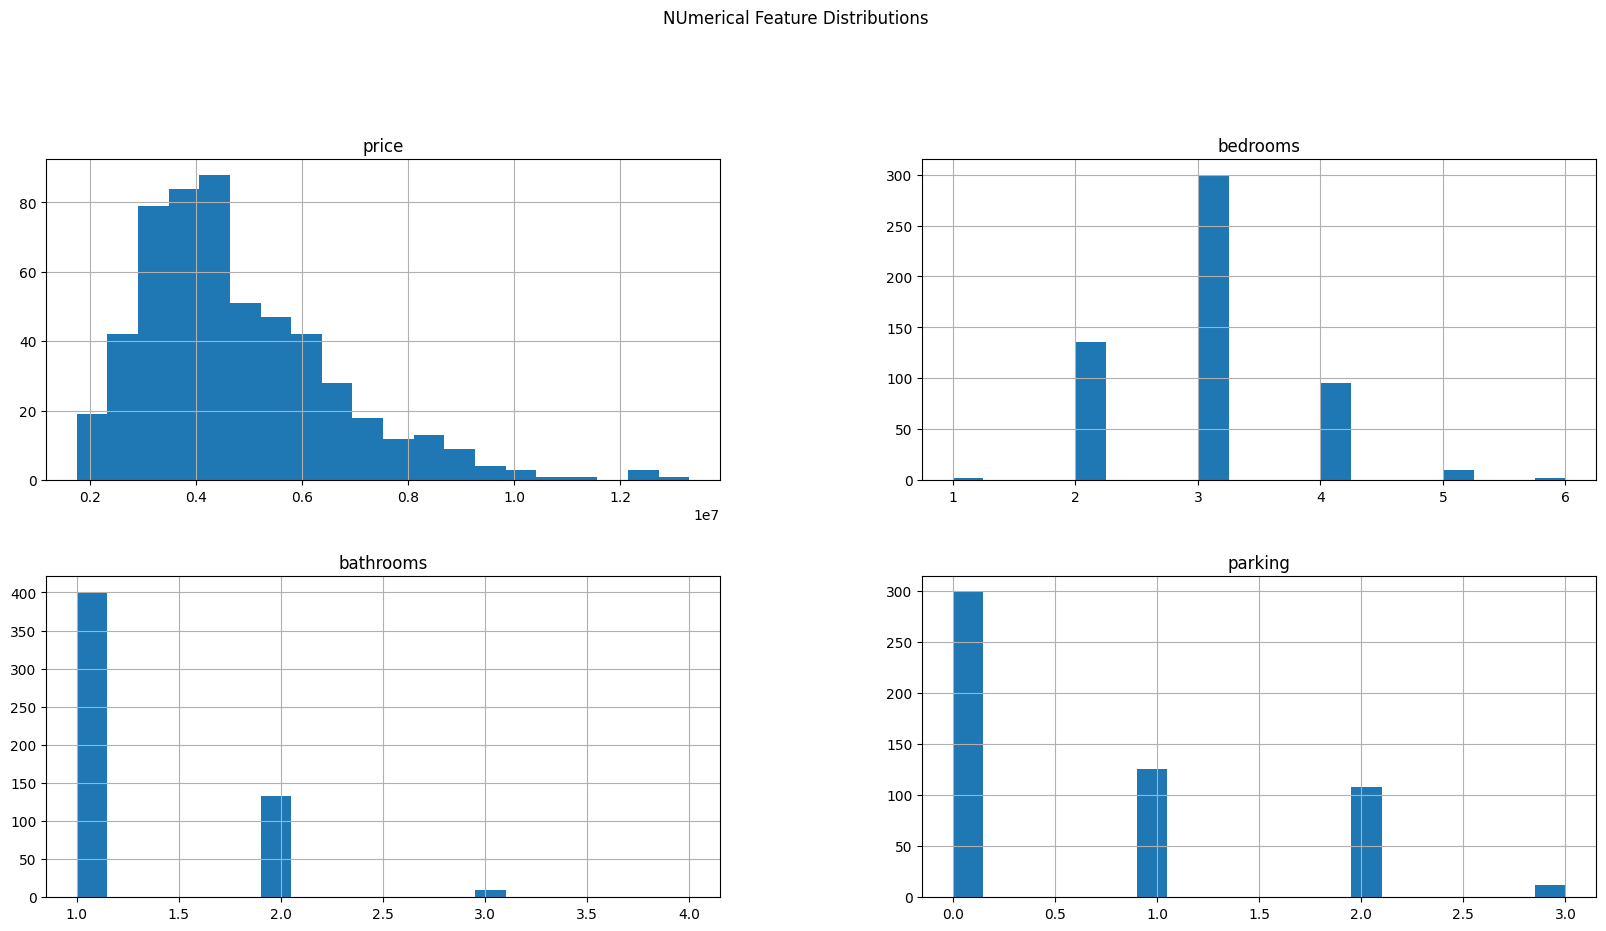

In [9]:
data[['price', 'bedrooms', 'bathrooms', 'parking', 'guestroom']].hist(bins=20, figsize=(20, 15), layout=(3, 2))
plt.suptitle("NUmerical Feature Distributions")
plt.show()

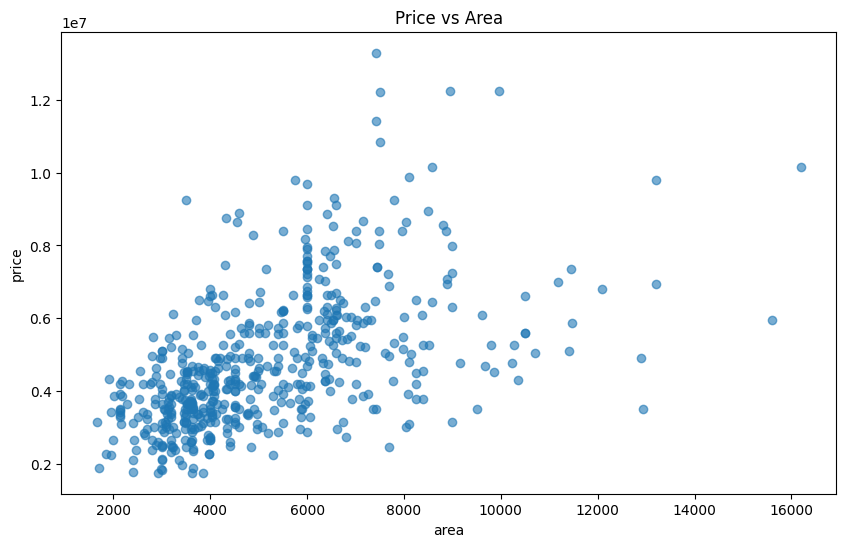

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(data['area'], data['price'], alpha=0.6)
plt.title('Price vs Area')
plt.xlabel('area')
plt.ylabel('price')
plt.show()

In [11]:
def plot_feature_comparison(data, x_feature="area", y_feature="price"):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, x=x_feature, y=y_feature)
    plt.title(f"Comparison of {y_feature} across {x_feature}")
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.xticks(rotation=45)  # Rotate x labels if necessary
    plt.tight_layout()       # Adjust layout for better display
    plt.show()

In [12]:
#label encoding the binary columns, label encoding can only take in one fature at a time that is why we have the "for" loop 
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea',]
le = LabelEncoder()
for column in binary_columns:
    data[column] = le.fit_transform(data[column])




In [18]:
#one hot encoding 
data = pd.get_dummies(data, columns=["furnishingstatus"])
print(data_encoded.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_furnished  furnishingstatus_semi-furnished  \
0                        True                            False   
1                        T

In [19]:
#Final data inspection 
print(data.head())
print(data.info())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_furnished  furnishingstatus_semi-furnished  \
0                        True                            False   
1                        T

In [21]:
X = data.drop('price', axis=1)
y = data['price']
print(X.head())
print(y.head())

   area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  7420         4          2        3         1          0         0   
1  8960         4          4        4         1          0         0   
2  9960         3          2        2         1          0         1   
3  7500         4          2        2         1          0         1   
4  7420         4          1        2         1          1         1   

   hotwaterheating  airconditioning  parking  prefarea  \
0                0                1        2         1   
1                0                1        3         0   
2                0                0        2         1   
3                0                1        3         1   
4                0                1        2         0   

   furnishingstatus_furnished  furnishingstatus_semi-furnished  \
0                        True                            False   
1                        True                            False   
2                   

In [30]:
#creating the model
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state=2)


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)




Mean Absolute Error: 831635.0030526065


In [33]:
#Evaluating our model 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 831635.0030526065


In [31]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1273374898779.1763


In [32]:
mae_percentage = (mae / y_test.mean()) * 100
print(f"MAE as a percentage of average target value: {mae_percentage:.2f}%")


MAE as a percentage of average target value: 17.24%


In [41]:
#Now I will try a tree based model for a more advance 

from sklearn.ensemble import RandomForestRegressor
r_model = RandomForestRegressor()
model.fit(X_train, y_train)
Ry_pred = model.predict(X_test)

In [42]:
#Evaluating our model 
from sklearn.metrics import mean_absolute_error
R_mae = mean_absolute_error(y_test, Ry_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 831635.0030526065


In [43]:
mae_percentage = (R_mae / y_test.mean()) * 100
print(f"MAE as a percentage of average target value: {mae_percentage:.2f}%")

MAE as a percentage of average target value: 17.24%


Conlusion: This project is a simple REgression project tpo work majorly on feature engineering so that i can imporve on my Exploratory Data Analysis. Both model performed very well since this a a house price prediction I decided not tune the parameter to improve accuracy. 